# Data Import

In [85]:
!pip install ucimlrepo


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\kikus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

In [87]:
# a

In [88]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 

# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets
# If load files from .csv: df = pl.read_csv("data/something.csv") - 

In [89]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


# (c) - solution
$w=(X^{T}X)^{-1}X^{T}y$


In [90]:
# Add bias term to X
train_X_np = np.hstack([np.ones((train_X.shape[0], 1)), train_X.values])
train_y_np = train_y.values

# Closed-form solution
w_closed = np.linalg.inv(train_X_np.T @ train_X_np) @ train_X_np.T @ train_y_np

# Predict on train set
y_pred_train = train_X_np @ w_closed

# d. plot

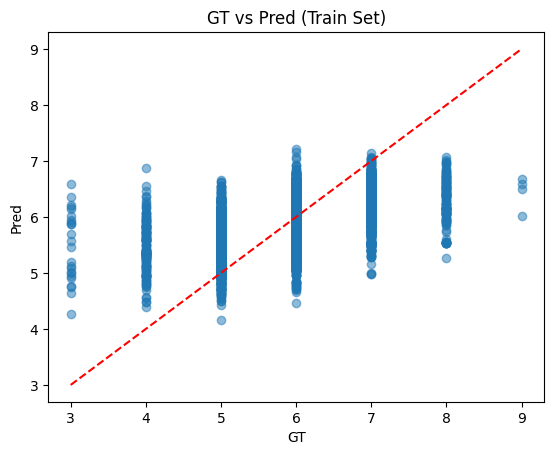

In [91]:
import matplotlib.pyplot as plt

plt.scatter(train_y_np, y_pred_train, alpha=0.5)
plt.xlabel("GT")
plt.ylabel("Pred")
plt.title("GT vs Pred (Train Set)")
plt.plot([train_y_np.min(), train_y_np.max()], [train_y_np.min(), train_y_np.max()], 'r--')
plt.show()

# e. RMSE

In [92]:
# Prepare test set with bias
test_X_np = np.hstack([np.ones((test_X.shape[0], 1)), test_X.values])
test_y_np = test_y.values

# Predict on test set
y_pred_test = test_X_np @ w_closed

# RMSE
rmse_train = np.sqrt(mean_squared_error(train_y_np, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(test_y_np, y_pred_test))

print(f"Train RMSE: {rmse_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")

Train RMSE: 0.7338
Test RMSE: 0.7394


f. split the train set into train and valid:

In [93]:
train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size=0.25, random_state=42)

In [99]:
def lms(X, y, w0, eta, scaler, epochs=10):
    X = scaler.transform(X)
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    y = y.values
    w = w0.copy()
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            y_pred = X[i] @ w
            error = y[i] - y_pred
            w += eta * error * X[i]
    return w

In [102]:
w0 = np.random.randn(train_X.shape[1]+1)

etas = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
best_eta = None
best_rmse = 100
scaler = StandardScaler()
scaler.fit(train_X)

for eta in etas:
    w = lms(train_X, train_y, w0, eta, scaler, epochs=100)
    valid_X_np = np.hstack([np.ones((valid_X.shape[0], 1)), valid_X.values])
    valid_y_np = valid_y.values
    y_pred_valid = valid_X_np @ w
    rmse = np.sqrt(mean_squared_error(valid_y_np, y_pred_valid))
    print(f"eta={eta}, Validation RMSE={rmse:.4f}")
    if rmse < best_rmse:
        best_rmse = rmse
        best_eta = eta

print(f"Selected eta: {best_eta}")

eta=0.01, Validation RMSE=8.3177
eta=0.001, Validation RMSE=8.6779
eta=0.0001, Validation RMSE=8.6057
eta=1e-05, Validation RMSE=15.3740
eta=1e-06, Validation RMSE=35.7776
Selected eta: 0.01


In [104]:
w_final = lms(train_X, train_y, w0, best_eta, scaler, epochs=10)

In [105]:
# Train set
train_X_np = np.hstack([np.ones((train_X.shape[0], 1)), train_X.values])
train_y_np = train_y.values
y_pred_train_lms = train_X_np @ w_final
rmse_train_lms = np.sqrt(mean_squared_error(train_y_np, y_pred_train_lms))

# Test set
test_X_np = np.hstack([np.ones((valid_X.shape[0], 1)), valid_X.values])
test_y_np = valid_y.values
y_pred_test_lms = test_X_np @ w_final
rmse_test_lms = np.sqrt(mean_squared_error(test_y_np, y_pred_test_lms))

print(f"LMS Train RMSE: {rmse_train_lms:.4f}")
print(f"LMS Test RMSE: {rmse_test_lms:.4f}")

LMS Train RMSE: 8.3557
LMS Test RMSE: 8.3177
